In [152]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import sys
from iminuit import Minuit
from matplotlib.colors import ListedColormap
from tqdm import tqdm
import os
from scipy.interpolate import interp1d
from scipy.interpolate import PchipInterpolator, InterpolatedUnivariateSpline

In [151]:
import shap
import spektral
from spektral.layers import GCNConv

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors

In [83]:
# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [150]:
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

In [208]:
print(os.listdir(torch_geometric.__path__[0]))

['visualization', 'metrics', 'logging.py', 'backend.py', 'explain', 'experimental.py', 'lazy_loader.py', 'nn', 'home.py', 'isinstance.py', 'distributed', 'deprecation.py', 'edge_index.py', 'warnings.py', 'datasets', 'io', 'inspector.py', '__init__.py', 'utils', '__pycache__', 'config_store.py', 'contrib', 'graphgym', 'testing', 'seed.py', 'transforms', 'profile', 'sampler', 'loader', 'debug.py', 'resolver.py', 'template.py', '_compile.py', 'typing.py', 'data']


In [209]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch_geometric

from torch_geometric.nn import GCNConv, GNNExplainer
from torch_geometric.data import Data, DataLoader


ImportError: cannot import name 'GNNExplainer' from 'torch_geometric.nn' (/usr/local/lib/python3.9/site-packages/torch_geometric/nn/__init__.py)

In [86]:
sys.path.append('../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, simpson38
from ExternalFunctions import nice_string_output, add_text_to_ax 

In [87]:
COLOUR = ['#1E90FF', # 0 # Dodgerblue
          '#FFBF00', # 1 # Amber
          '#FF6347', # 2 # Tomato
          '#00A86B', # 3 # Jade
          '#8A2BE2', # 4 # Blueviolet
          '#FF6FFF', # 5 # Ultra Pink
          '#00CCFF', # 6 # Vivid Sky Blue
          '#00ff40', # 7 # Erin
          '#FF004F', # 8 # Folly
          '#0063A6', # 9 # Lapis Lazuli
        ]
def setMplParam(classNum):
    # Define effective colors, line styles, and markers based on the class number
   
    LINE = ['-', '-.', '--', '-.', ':','--','-.','-', ':', '--']
    MARKER = ['.','*', '^', 's', '.', 'p', 'o', 's', '.', 'd']
    COLOUR_EFF = COLOUR[:classNum]
    LINE_EFF = LINE[:classNum]
    MARKER_EFF = MARKER[:classNum]

    # Set the color cycle for lines including color, line style, and marker
    plt.rcParams['axes.prop_cycle'] = (plt.cycler(color=COLOUR_EFF) +
                                       plt.cycler(linestyle=LINE_EFF)+
                                       plt.cycler(marker=MARKER_EFF))

    # Set default line and marker sizes
    plt.rcParams['lines.markersize'] = 3  # Example size
    plt.rcParams['lines.linewidth'] = 2   # Example width for lines

    # Set label and title sizes
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 20

    # Set tick properties
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['ytick.labelsize'] = 20

    # Set legend font size
    plt.rcParams['legend.fontsize'] = 12

    # Enable and configure grid
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.8
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.linewidth'] = 1

    # Set axes line width
    plt.rcParams['axes.linewidth'] = 2

    # Set tick sizes and widths
    plt.rcParams['xtick.major.size'] = 7
    plt.rcParams['xtick.major.width'] = 3
    plt.rcParams['xtick.minor.size'] = 2
    plt.rcParams['xtick.minor.width'] = 2

    plt.rcParams['ytick.major.size'] = 7
    plt.rcParams['ytick.major.width'] = 3
    plt.rcParams['ytick.minor.size'] = 2
    plt.rcParams['ytick.minor.width'] = 2

setMplParam(10)


In [88]:
def readTrainData():
    path = 'sources/'
    df = pd.read_csv(path+'AppML_InitialProject_train.csv')
    return df
trainDf = readTrainData()

In [89]:
trainDf

,averageInteractionsPerCrossing,p_Rhad1,p_Rhad,p_f3,p_weta2,p_Rphi,p_Reta,p_Eratio,p_f1,p_TRTPID,...,p_eta,p_phi,p_charge,p_Truth_isElectron,p_truth_pt,p_truth_phi,p_truth_eta,p_Truth_Energy,p_truth_pdgId,p_truth_parent_pdgId
0,29.49,0.105563,0.111953,0.000000,0.020473,0.746226,0.671689,0.000000,0.000000,0.063020,...,-1.425603,-0.859392,-1.0,1,2815.96020,-0.828581,-1.425959,6198.1055,11,22
1,17.50,0.001889,0.001663,0.007252,0.009059,0.944349,0.967633,0.955249,0.135955,0.059219,...,-0.380698,-1.014216,-1.0,1,39207.48000,-1.014038,-0.380727,42083.5980,11,23
2,30.50,-0.001041,-0.001294,0.006346,0.008852,0.976413,0.959573,0.937885,0.171204,-0.105151,...,0.591333,2.983345,1.0,1,64328.51600,2.981821,0.592576,75957.2800,-11,23
3,46.49,0.000606,0.002833,0.005985,0.009785,0.950910,0.945615,0.966444,0.263183,-0.026020,...,1.006222,0.503709,1.0,1,46312.54700,0.503773,1.006411,71814.3700,-11,23
4,31.50,0.024148,0.067781,0.034671,0.009486,0.797810,0.670594,0.087876,0.373575,0.219026,...,-1.674565,1.063436,-1.0,1,858.65717,1.060842,-1.676498,2375.8310,11,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,36.50,0.492974,1.262969,0.025889,0.015685,0.472843,0.684885,0.287160,0.304126,-0.148706,...,0.540303,-3.105240,1.0,0,32911.66400,-3.105209,0.540659,37840.4920,211,2
179996,31.50,0.076596,0.572484,0.117248,0.009608,0.958072,0.936306,0.076313,0.274991,-0.109284,...,0.541794,1.783658,-1.0,0,13656.11700,1.783581,0.541314,15706.8370,-211,-213
179997,30.50,1.674750,2.193961,0.019816,0.011431,0.787651,0.670452,0.343338,0.112708,0.017916,...,0.140798,-3.116873,-1.0,0,5216.26300,-3.116861,0.141633,5270.5180,-211,223
179998,36.50,0.040680,0.043097,0.008589,0.012814,0.619827,0.598550,0.342507,0.298415,-0.095350,...,1.321953,-0.292104,1.0,0,18433.30000,-0.292308,1.321826,37022.7270,211,113


In [90]:
def readTestData():
    path = 'sources/'
    df_classification = pd.read_csv(path+'AppML_InitialProject_test_classification.csv')
    df_clustering = pd.read_csv(path+'AppML_InitialProject_test_clustering.csv')
    df_regression = pd.read_csv(path+'AppML_InitialProject_test_regression.csv')
    return df_classification, df_clustering, df_regression
testDf_clsf, testDf_clst, testDf_regs = readTestData()

In [91]:
testDf_clsf

,averageInteractionsPerCrossing,p_Rhad1,p_Rhad,p_f3,p_weta2,p_Rphi,p_Reta,p_Eratio,p_f1,p_TRTPID,...,pX_E7x11_Lr0,pX_E7x11_Lr1,pX_E7x11_Lr2,pX_E7x11_Lr3,pX_E7x7_Lr0,pX_E7x7_Lr1,p_pt_track,p_eta,p_phi,p_charge
0,36.50,0.000463,-0.000876,0.002665,0.009376,0.937129,0.959152,0.984819,0.326582,0.238975,...,1868.9042,16364.933,33013.040,76.07219,1868.9042,16364.933,20527.746,0.325806,1.086726,1.0
1,48.50,0.050439,0.069607,0.028404,0.013048,0.700572,0.590812,0.000000,0.000000,-0.000000,...,0.0000,50501.242,182841.720,19097.24800,0.0000,50501.242,11949.609,-2.450711,0.354888,-1.0
2,32.50,0.002050,0.003029,0.007395,0.010444,0.963112,0.959066,0.985446,0.353189,0.666636,...,905.5605,13357.994,22515.666,314.40604,905.5605,13357.994,35849.570,0.140523,0.733514,-1.0
3,28.50,0.027664,0.043439,0.011525,0.011258,0.962601,0.948064,0.984326,0.345560,0.240108,...,0.0000,32864.360,61438.790,975.66034,0.0000,32864.360,18349.436,1.948463,-2.287875,1.0
4,20.49,-0.008994,-0.011444,0.007584,0.010042,0.965167,0.955182,0.993133,0.268595,0.139726,...,1970.9218,19733.762,51706.180,1139.15390,1970.9218,19761.928,54046.035,-0.726814,2.317220,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,34.50,0.450859,0.494188,0.000000,0.000000,0.000800,-0.004000,0.000000,0.000000,0.079010,...,26463.0250,36277.290,36799.094,154.07170,26463.0250,33269.820,15200.653,1.475503,-0.021296,1.0
59996,29.49,0.265472,0.720422,0.008196,0.010941,0.811148,0.919864,0.031265,0.258551,0.131573,...,5135.4090,11495.376,27522.310,170.00873,5135.4090,11495.376,12442.076,-0.858835,-1.879149,1.0
59997,49.50,0.192758,0.273979,0.126550,0.013108,0.923015,0.936289,0.000163,0.128086,0.324599,...,8782.7180,9258.149,55382.840,12358.93300,8782.7180,9258.149,44505.652,-1.699267,1.073709,-1.0
59998,35.50,0.345104,0.436920,0.034847,0.012072,0.802757,0.834948,0.000000,0.000000,-0.000000,...,0.0000,47620.070,217042.200,13176.30400,0.0000,47620.070,53259.473,2.468021,-2.511265,-1.0


In [92]:
testDf_clst

,averageInteractionsPerCrossing,p_Rhad1,p_Rhad,p_f3,p_weta2,p_Rphi,p_Reta,p_Eratio,p_f1,p_TRTPID,...,pX_E7x11_Lr0,pX_E7x11_Lr1,pX_E7x11_Lr2,pX_E7x11_Lr3,pX_E7x7_Lr0,pX_E7x7_Lr1,p_pt_track,p_eta,p_phi,p_charge
0,48.50,0.002621,0.003149,0.000421,0.012095,0.873118,0.837550,0.000000,0.000000,0.231180,...,26052.62100,18763.9260,13017.211,-57.970287,26052.62100,18820.9820,48257.5500,-1.505234,1.175829,-1.0
1,39.49,0.014003,0.008869,0.041638,0.010281,0.925357,0.940242,0.950630,0.135817,0.303750,...,0.00000,18765.0780,119595.300,6125.241700,0.00000,18734.8180,33935.6500,1.995196,-1.292367,1.0
2,25.49,0.007870,0.009702,0.004270,0.010424,0.939269,0.958781,0.984077,0.391043,0.041206,...,4592.48900,21492.4510,28992.730,596.587800,4592.48900,21492.4510,44557.0900,-0.797741,-1.067770,-1.0
3,28.50,0.001414,-0.004248,0.012807,0.013539,0.916596,0.913783,0.991349,0.516933,-0.000000,...,0.00000,50264.5740,51692.957,-31.530766,0.00000,50264.5740,9718.2190,-2.276100,1.133550,1.0
4,23.50,0.000988,-0.023321,0.010335,0.010201,0.816869,0.921899,0.941022,0.390446,1.016616,...,688.87744,42935.8480,68867.445,590.925900,688.87744,42935.8480,25790.2190,1.871118,-0.622213,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,41.49,0.228431,0.522523,0.004807,0.015567,0.755933,0.467267,0.545339,0.469139,0.102263,...,2119.91600,19943.8500,43843.484,2144.287000,2119.91600,19865.7100,13294.7360,-0.125354,1.901233,-1.0
19996,33.50,0.046517,0.324909,0.006538,0.011492,0.845218,0.831077,0.085903,0.220015,-0.015957,...,3875.20310,7355.2130,26095.656,1062.750000,3875.20310,7355.2130,12671.7760,1.015306,2.975697,1.0
19997,20.49,0.903955,1.183762,0.073063,0.013042,0.804634,0.686622,0.804377,0.249756,0.024105,...,2255.14300,6096.4795,17283.645,4235.365000,2255.14300,6096.4795,33278.6700,0.653617,0.767755,-1.0
19998,37.50,0.381709,0.706533,0.019395,0.011556,0.852819,0.860969,0.110009,0.221309,-0.039300,...,3007.39580,15878.5160,46878.400,4535.643000,3007.39580,15878.5160,3054.2612,0.528555,-1.317966,-1.0


In [93]:
testDf_regs

,averageInteractionsPerCrossing,p_Rhad1,p_Rhad,p_f3,p_weta2,p_Rphi,p_Reta,p_Eratio,p_f1,p_TRTPID,...,pX_E7x11_Lr0,pX_E7x11_Lr1,pX_E7x11_Lr2,pX_E7x11_Lr3,pX_E7x7_Lr0,pX_E7x7_Lr1,p_pt_track,p_eta,p_phi,p_charge
0,36.50,-0.006231,-0.004756,0.000000,0.011021,0.939902,0.933349,0.940145,0.240089,0.742557,...,9555.348000,12439.4170,30005.940,30.267273,9555.348000,12439.4170,27331.0250,-1.356775,2.437287,1.0
1,27.50,0.069768,0.066464,0.008597,0.010425,0.947139,0.956537,0.954305,0.378152,0.053620,...,-32.166813,7150.0110,11357.543,223.495700,-32.166813,7150.0110,14839.9460,0.758425,0.424543,1.0
2,38.50,0.031475,0.032103,0.006010,0.009790,0.971168,0.975648,0.982716,0.261825,0.348544,...,930.292700,13870.4400,37771.043,235.996550,930.292700,13870.4400,47934.7800,0.451583,1.543324,1.0
3,44.49,0.255715,0.598475,0.023568,0.017368,0.759111,0.413124,0.000000,0.000000,-0.000000,...,0.000000,30461.0350,101239.040,17743.662000,0.000000,30461.0350,1547.0653,2.386935,-2.541257,-1.0
4,46.49,-0.002943,0.000832,0.005014,0.009650,0.978518,0.975219,0.989922,0.400065,0.328410,...,716.887100,16007.3790,25491.777,280.913300,716.887100,16007.3790,38393.7200,-0.595902,2.444494,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,45.49,0.639871,0.931700,0.047565,0.014313,0.751563,0.481971,0.049648,0.222836,0.182798,...,1919.307000,5069.9614,12153.055,1186.884900,2981.303000,3690.7695,13794.3930,-0.908004,-2.500148,-1.0
39996,23.50,0.035678,0.035608,0.006525,0.013475,0.553298,0.772175,0.485771,0.300058,-0.134290,...,12320.759000,9364.2210,18286.041,3545.511200,12481.400000,10613.4300,24288.5330,1.532268,1.387485,-1.0
39997,30.50,0.506169,1.408881,0.004859,0.012234,0.749204,0.798801,0.289237,0.297742,-0.078994,...,3829.177200,10531.5870,22682.910,922.046450,4448.633300,8834.5300,46904.3700,0.871931,0.338847,-1.0
39998,34.50,0.029772,0.015480,0.013480,0.012181,0.855929,0.755831,0.303872,0.201922,-0.044859,...,0.000000,29014.9770,87093.380,2459.278600,0.000000,28916.5590,14215.0450,1.921771,-0.448903,1.0


In [94]:
def compare(test, train):
    setTest = set(test.columns)
    setTrain = set(train.columns)
    tags = setTrain - setTest
    return tags

In [121]:
# print(compare(testDf_clsf, trainDf))
# print(compare(testDf_regs, trainDf))
# print(compare(testDf_clst, trainDf))
missingTags = compare(testDf_clsf, trainDf) | compare(testDf_regs, trainDf) | compare(testDf_clst, trainDf)
missingTags


{'p_Truth_Energy',
 'p_Truth_isElectron',
 'p_truth_eta',
 'p_truth_parent_pdgId',
 'p_truth_pdgId',
 'p_truth_phi',
 'p_truth_pt'}

* `FNNClassifier` builds a TensorFlow feedforward neural network classifier
* `CNNClassifier` builds a TensorFlow convolution neural network classifier
* `GNNClassifier` builds a TensorFlow graph neural network classifier
* it can be used as other sklearn classifiers or xgboost having these public functions(methods)
  * `fit`
  * `predict`

In [96]:
class FNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, num_classes, epochs=50):
        self.input_dim = None  # Will be set based on input data
        self.num_classes = num_classes
        self.epochs = epochs
        self.model = None

    def fit(self, X, y):
        if self.model is None:
            self.input_dim = X.shape[1]
            self.model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(128, activation='relu', input_shape=(self.input_dim,)),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(self.num_classes, activation='softmax')
            ])
            self.model.compile(optimizer='adam',
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])
        self.model.fit(X, y, epochs=self.epochs, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X).argmax(axis=1)

In [193]:
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)  # Initialize first GCN layer
        self.conv2 = GCNConv(16, num_classes)  # Initialize second GCN layer

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)  # Pass data through first GCN layer
        x = F.relu(x)  # Apply ReLU non-linearity
        x = self.conv2(x, edge_index)  # Pass data through second GCN layer
        return F.log_softmax(x, dim=1)

In [194]:
class GNNClassifier:
    def __init__(self, num_classes, num_features, epochs=50):
        self.num_classes = num_classes
        self.num_features = num_features
        self.epochs = epochs
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = GCN(num_features, num_classes).to(self.device)

    def fit(self, loader):
        self.model.train()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.01)
        for epoch in range(self.epochs):
            for batch in loader:
                batch = batch.to(self.device)
                optimizer.zero_grad()
                output = self.model(batch.x, batch.edge_index)
                loss = F.nll_loss(output, batch.y)
                loss.backward()
                optimizer.step()

    def predict(self, loader):
        self.model.eval()
        all_predictions = []
        for batch in loader:
            batch = batch.to(self.device)
            output = self.model(batch.x, batch.edge_index)
            pred = output.max(dim=1)[1]
            all_predictions.extend(pred.cpu().numpy())
        return all_predictions

In [131]:
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000, C=0.5, solver='lbfgs'),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt'),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic'),
    'FNN': FNNClassifier(num_classes=2, epochs=50),
    'GNN': GNNClassifier(num_classes=2, num_features=140, epochs=50),
}
classifiers.keys()

dict_keys(['LogisticRegression', 'RandomForest', 'AdaBoost', 'GradientBoosting', 'XGBoost', 'FNN', 'GNN'])

In [98]:
features = ["averageInteractionsPerCrossing",
            "p_Rhad1",
            "p_Rhad",
            "p_f3",
            "p_weta2",
            "p_Rphi",
            "p_Reta",
            "p_Eratio",
            "p_f1",
            "p_TRTPID",
            "p_numberOfInnermostPixelHits",
            "p_numberOfPixelHits",
            "p_numberOfSCTHits",
            "p_numberOfTRTHits",
            "p_TRTTrackOccupancy",
            "p_numberOfTRTXenonHits",
            "p_z0",
            "p_d0",
            "p_sigmad0",
            "p_dPOverP",
            "p_deltaEta1",
            "p_deltaPhiRescaled2",
            "p_etcone20",
            "p_etcone30",
            "p_etcone40",
            "p_ptcone20",
            "p_ptcone30",
            "p_ptcone40",
            "p_ptPU30",
            "p_vertex",
            "pX_E7x7_Lr2",
            "pX_E7x7_Lr3",
            "pX_E_Lr0_HiG",
            "pX_E_Lr0_MedG",
            "pX_E_Lr1_HiG",
            "pX_E_Lr1_LowG",
            "pX_E_Lr1_MedG",
            "pX_E_Lr2_HiG",
            "pX_E_Lr2_LowG",
            "pX_E_Lr2_MedG",
            "pX_E_Lr3_HiG",
            "pX_E_Lr3_MedG",
            "pX_MultiLepton",
            "pX_OQ",
            "pX_ambiguityType",
            "pX_asy1",
            "pX_author",
            "pX_barys1",
            "pX_core57cellsEnergyCorrection",
            "pX_deltaEta0",
            "pX_deltaEta1",
            "pX_deltaEta2",
            "pX_deltaEta3",
            "pX_deltaPhi0",
            "pX_deltaPhi1",
            "pX_deltaPhi2",
            "pX_deltaPhi3",
            "pX_deltaPhiFromLastMeasurement",
            "pX_deltaPhiRescaled0",
            "pX_deltaPhiRescaled1",
            "pX_deltaPhiRescaled3",
            "pX_e1152",
            "pX_e132",
            "pX_e235",
            "pX_e255",
            "pX_e2ts1",
            "pX_ecore",
            "pX_emins1",
            "pX_etcone20",
            "pX_etcone30",
            "pX_etcone40",
            "pX_f1core",
            "pX_f3core",
            "pX_maxEcell_energy",
            "pX_maxEcell_gain",
            "pX_maxEcell_time",
            "pX_maxEcell_x",
            "pX_maxEcell_y",
            "pX_maxEcell_z",
            "pX_nCells_Lr0_HiG",
            "pX_nCells_Lr0_MedG",
            "pX_nCells_Lr1_HiG",
            "pX_nCells_Lr1_LowG",
            "pX_nCells_Lr1_MedG",
            "pX_nCells_Lr2_HiG",
            "pX_nCells_Lr2_LowG",
            "pX_nCells_Lr2_MedG",
            "pX_nCells_Lr3_HiG",
            "pX_nCells_Lr3_MedG",
            "pX_neflowisol20",
            "pX_neflowisol30",
            "pX_neflowisol40",
            "pX_neflowisolcoreConeEnergyCorrection",
            "pX_pos",
            "pX_pos7",
            "pX_poscs1",
            "pX_poscs2",
            "pX_ptcone20",
            "pX_ptcone30",
            "pX_ptcone40",
            "pX_ptconecoreTrackPtrCorrection",
            "pX_ptvarcone20",
            "pX_ptvarcone30",
            "pX_ptvarcone40",
            "pX_r33over37allcalo",
            "pX_topoetcone20",
            "pX_topoetcone20ptCorrection",
            "pX_topoetcone30",
            "pX_topoetcone30ptCorrection",
            "pX_topoetcone40",
            "pX_topoetcone40ptCorrection",
            "pX_topoetconecoreConeEnergyCorrection",
            "pX_weta1",
            "pX_widths1",
            "pX_wtots1",
            "pX_e233",
            "pX_e237",
            "pX_e2tsts1",
            "pX_ehad1",
            "pX_emaxs1",
            "pX_fracs1",
            "pX_DeltaE",
            "pX_E3x5_Lr0",
            "pX_E3x5_Lr1",
            "pX_E3x5_Lr2",
            "pX_E3x5_Lr3",
            "pX_E5x7_Lr0",
            "pX_E5x7_Lr1",
            "pX_E5x7_Lr2",
            "pX_E5x7_Lr3",
            "pX_E7x11_Lr0",
            "pX_E7x11_Lr1",
            "pX_E7x11_Lr2",
            "pX_E7x11_Lr3",
            "pX_E7x7_Lr0",
            "pX_E7x7_Lr1",
            "p_pt_track",
            "p_eta",
            "p_phi",
            "p_charge",]

* `getCM`: Calculates the confusion matrix, accuracy, and fraction of wrong predictions.
  * `predictions`: Array of predicted labels
  * `true_labels`: Array of true labels
  * returns Tuple containing the confusion matrix, accuracy, and fraction of wrong predictions

In [99]:
def getCM(predictions, true_labels):
    # Initialize the confusion matrix
    N = np.zeros((2, 2), dtype=int)
    
    # Loop through all predictions and true labels to populate the confusion matrix
    for i in range(len(predictions)):
        # Increase the corresponding count in the confusion matrix
        N[true_labels[i]][predictions[i]] += 1

    # Calculate the fraction of wrong predictions
    fracWrong = float(N[0][1] + N[1][0]) / float(len(true_labels))
    
    # Calculate the accuracy
    accuracy = 1.0 - fracWrong
    
    return N, accuracy, fracWrong

In [100]:
def getConfusionMatrix(predictions, true_labels):
    return confusion_matrix(true_labels, predictions)

In [101]:
def showCM(predictions, true_labels):
    N, accuracy, fracWrong = getCM(predictions, true_labels)
    print("\nRESULT OF HUMAN ATTEMPT AT A GOOD SELECTION:")
    print("  First number in parenthesis is the estimate, second is the MC truth:")
    print("  True-Negative (0,0)  = ", N[0][0])
    print("  False-Negative (0,1) = ", N[0][1])
    print("  False-Positive (1,0) = ", N[1][0])
    print("  True-Positive (1,1)  = ", N[1][1])
    print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
    print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)

In [102]:
def saveToCsv(predictions, filename):
    df = pd.DataFrame(predictions)
    df.to_csv(filename, index=False)

* `getEdgeIndex` creates an edge_index tensor using the k-nearest neighbors approach.
* Parameters:
  * `X` (np.array): Feature matrix of shape (num_samples, num_features)
  * `k` (int): Number of nearest neighbors to connect each node with
* returns `edge_index` (torch.tensor): Tensor of shape (2, num_edges) for use in GNN

In [143]:
def getEdgeIndex(X, k=5):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
    distances, indices = nbrs.kneighbors(X)

    # Create edge index array
    edge_index = []
    num_nodes = X.shape[0]
    for i in range(num_nodes):
        for j in range(1, k+1):  # start from 1 to avoid self-loops
            edge_index.append([i, indices[i, j]])
            edge_index.append([indices[i, j], i])  # add reverse connection for undirected graph

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    return edge_index

In [189]:
def getClsfFeaturesKernel(trainDf, key, Nfeatures=20):
    classifier = classifiers[key]
    X_train = trainDf.drop(missingTags, axis=1)
    y_train = trainDf['p_Truth_isElectron']
    
    if key == 'GNN':
        edge_index = getEdgeIndex(X_train.values)  # Assuming this returns a valid edge_index tensor
        X_tensor = torch.tensor(X_train.values, dtype=torch.float)
        y_tensor = torch.tensor(y_train.values, dtype=torch.long)
        data = Data(x=X_tensor, edge_index=edge_index, y=y_tensor)
        
        loader = DataLoader([data], batch_size=32, shuffle=True)  # Correctly created DataLoader
        classifier.fit(loader)
    else: 
        classifier.fit(X_train.values, y_train.values)

    # Tree Explainer for XGB
    if classifier == classifiers['XGBoost']:
        explainer = shap.TreeExplainer(classifier)
    else:
        explainer = shap.KernelExplainer(classifier.predict, shap.sample(X_train, 100))  # Using a sample for approximation

    shap_values = explainer.shap_values(shap.sample(X_train, 100))  # Again, using a sample for practicality

    # Calculate the mean absolute SHAP values for each feature
    shap_summaries = np.abs(shap_values).mean(axis=0)

    # Sort the features by their mean absolute SHAP value in descending order
    indices = np.argsort(shap_summaries)[::-1]

    top_features = X_train.columns[indices[:Nfeatures]].tolist()

    shap.summary_plot(shap_values, X_train, plot_type='bar', max_display=Nfeatures)

    return top_features

In [104]:
# print(getClsfFeatures(trainDf, classifiers['AdaBoost'], Nfeatures=20))
# 5 min 40 sec

In [105]:
def makeVariableCsv(features, filename):
    df = pd.DataFrame(features)
    df.to_csv(filename, index=False, header=False)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  0%|          | 0/100 [00:00<?, ?it/s]

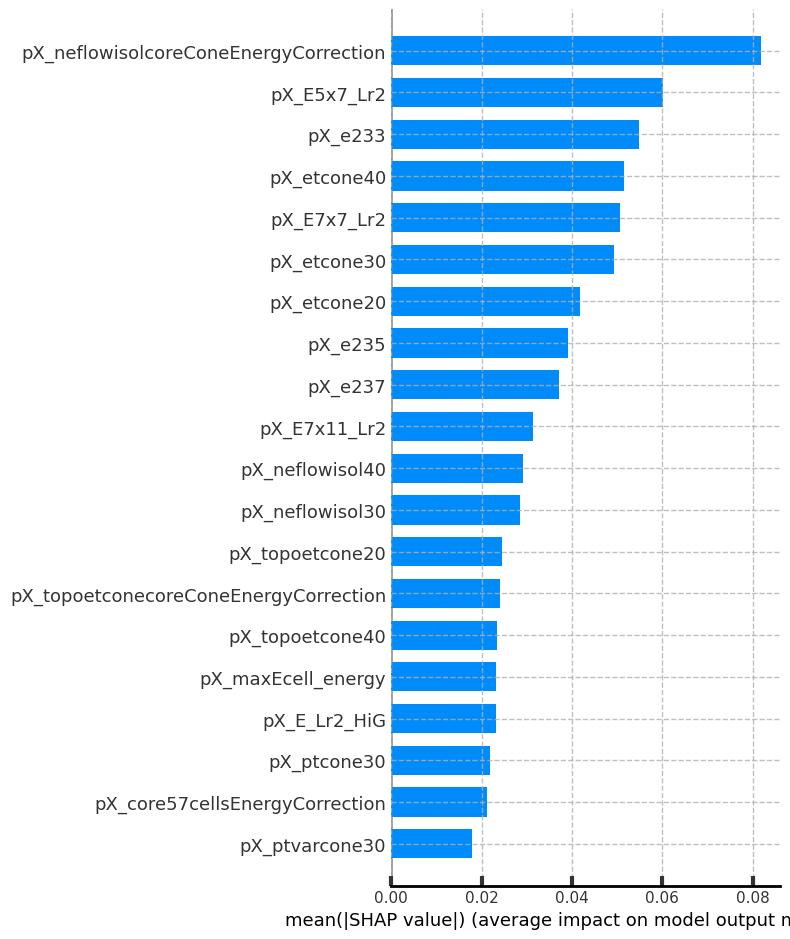

In [128]:
features_LR = getClsfFeaturesKernel(trainDf, 'LogisticRegression', Nfeatures=20)
# 1 min 30 sec
# 4 min 30 sec

  0%|          | 0/100 [00:00<?, ?it/s]

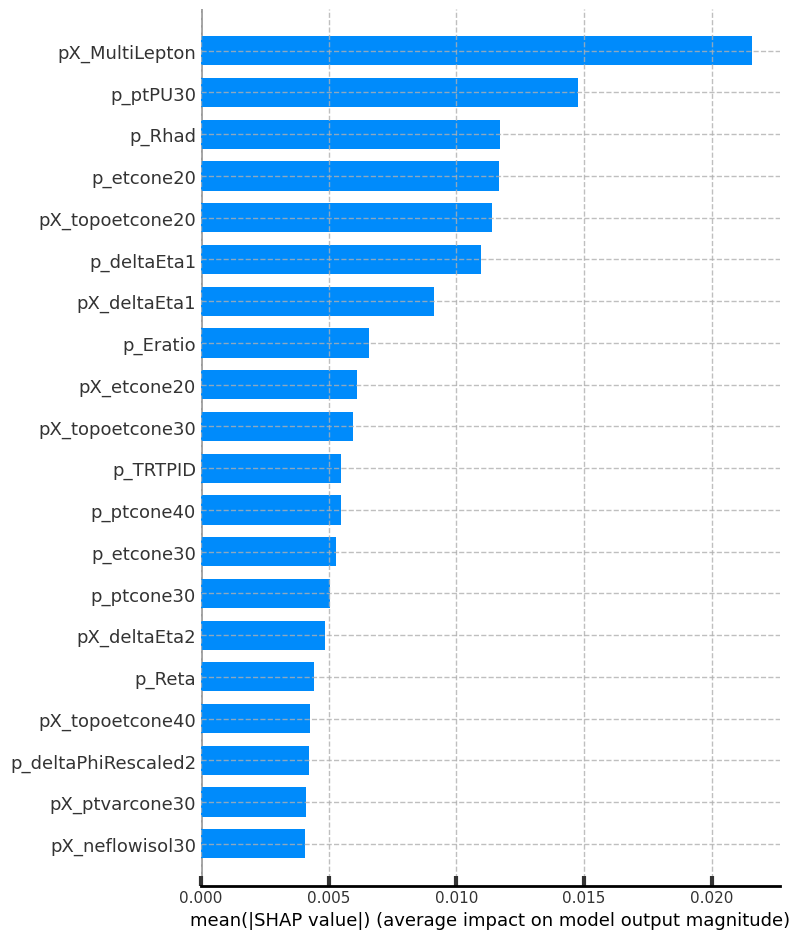

In [192]:
features_RF = getClsfFeaturesKernel(trainDf, 'RandomForest', Nfeatures=20)
#  4 m 30 s
# 13 m 12 s


In [191]:
features_GNN = getClsfFeaturesKernel(trainDf, 'GNN', Nfeatures=20)
# 

/usr/local/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


TypeError: 'DataLoader' object is not subscriptable

In [108]:
# features_AB = getClsfFeaturesKernel(trainDf, classifiers['AdaBoost'], Nfeatures=20)
# 7 m 50 s

In [109]:
# features_GB = getClsfFeaturesKernel(trainDf, classifiers['GradientBoosting'], Nfeatures=20)
# 3 min

In [110]:
# features_XGB = getClsfFeaturesKernel(trainDf, classifiers['XGBoost'], Nfeatures=20)
# TreeExplainer : 10 sec

In [111]:
# features_FNN = getClsfFeaturesKernel(trainDf, classifiers['FNN'], Nfeatures=20)
# 47 min

In [112]:
trainDf.shape

(180000, 147)

In [195]:
makeVariableCsv(features_LR, 'Classification_CyanYongHoJo_LogisticRegression_VariableList.csv')
makeVariableCsv(features_RF, 'Classification_CyanYongHoJo_RandomForest_VariableList.csv')
# makeVariableCsv(features_AB, 'Classification_CyanYongHoJo_AdaBoost_VariableList.csv')
# makeVariableCsv(features_GB, 'Classification_CyanYongHoJo_GradientBoosting_VariableList.csv')
# makeVariableCsv(features_XGB, 'Classification_CyanYongHoJo_XGBoost_VariableList.csv')
# makeVariableCsv(features_FNN, 'Classification_CyanYongHoJo_FNN_VariableList.csv')

In [114]:
def getFeatures():
    features = {}
    for classifier in classifiers.keys():
        path = 'solutions/Classification_CyanYongHoJo_' + classifier + '_VariableList.csv'
        features[classifier] = pd.read_csv(path, header=None).values.flatten().tolist()
    return features

In [115]:
selected_features = getFeatures()

In [116]:
# for i in getFeatures()['LogisticRegression']:
#     print(i)

for i in selected_features['FNN']:
    print(i)

pX_etcone20
pX_ptcone20
p_vertex
pX_deltaEta3
p_ptcone30
pX_maxEcell_z
pX_ptvarcone30
pX_maxEcell_y
p_f1
pX_e132
p_dPOverP
pX_r33over37allcalo
averageInteractionsPerCrossing
pX_asy1
pX_nCells_Lr1_HiG
p_Rhad
pX_deltaPhi2
p_truth_parent_pdgId
pX_e2ts1
pX_deltaPhi1


In [117]:
def runClsfCore(trainDf, testDf, classifier, features, filename):
    X_train = trainDf[features]
    y_train = trainDf['p_Truth_isElectron']

    X_test = testDf[features]

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    N, accuracy, fracWrong = getCM(y_pred, testDf['p_Truth_isElectron'])

    saveToCsv(y_pred, filename)

    return y_pred, N, accuracy, fracWrong

In [118]:
print(len(testDf_clsf.columns))
print(len(trainDf.columns))

140
147
